In [ ]:
import numpy as np
from bc import *

out = mlp(initial_learning_rate=0.3, final_learning_rate=0.3,
         L1_reg=0.000, L2_reg=0.000, n_epochs=50, batch_size=200,
         n_hidden=1024, n_hiddenLayers=3, verbose=True, 
         stochastic=False, binary=True, which_data='mnist', 
         seedval=420, outputlayer='logistic', early_stopping=False)

In [7]:
print 'W'
print np.min(out.hiddenLayers[0].W.eval()), np.max(out.hiddenLayers[0].W.eval())
print 'Wb'
print np.min(out.hiddenLayers[0].Wb.eval()), np.max(out.hiddenLayers[0].Wb.eval())

W
-0.999999 1.0
Wb
-1.0 1.0


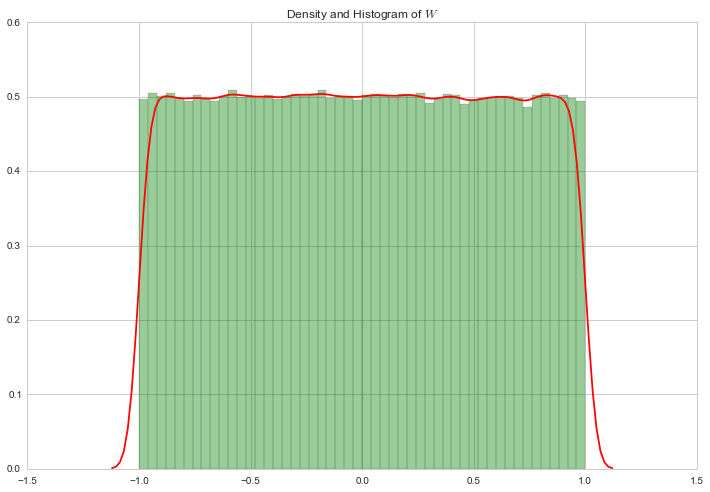

In [8]:
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

x = out.hiddenLayers[0].W.eval()
x = x.reshape(np.prod(x.shape))

plt.figure(figsize=(12,8))
plt.title('Density and Histogram of $W$')
sns.distplot(x, color='red', hist_kws={'color':'green'})
plt.show()